Wie gut lässt sich die Kundenzufriedenheit vorhersagen? 

Welche Merkmale haben den größten Einfluss auf die Zufriedenheit? 

Können wir potenzielle unzufriedene Kunden frühzeitig identifizieren? 

Kann man mit Regressionsmodellen konkrete Zufriedenheitsscores vorhersagen? 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 📥 1. Daten laden
df = pd.read_csv("data/Invistico_Airline.csv")

# 🧼 2. Zielspalte bereinigen und in numerisch umwandeln
df["satisfaction"] = df["satisfaction"].astype(str).str.strip().str.lower()
df = df[df["satisfaction"].isin(["satisfied", "dissatisfied"])]
df["satisfaction"] = df["satisfaction"].map({"satisfied": 1, "dissatisfied": 0})

# 🧠 3. Kategorische Variablen in Dummies umwandeln
categorical_cols = ["Gender", "Customer Type", "Type of Travel", "Class"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 🎯 4. Features und Ziel definieren
X = df.drop("satisfaction", axis=1)
y = df["satisfaction"]

# 🔀 5. Trainings-/Testdaten splitten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌳 6. Modell trainieren
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 📊 7. Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[11235   440]
 [  658 13643]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11675
           1       0.97      0.95      0.96     14301

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



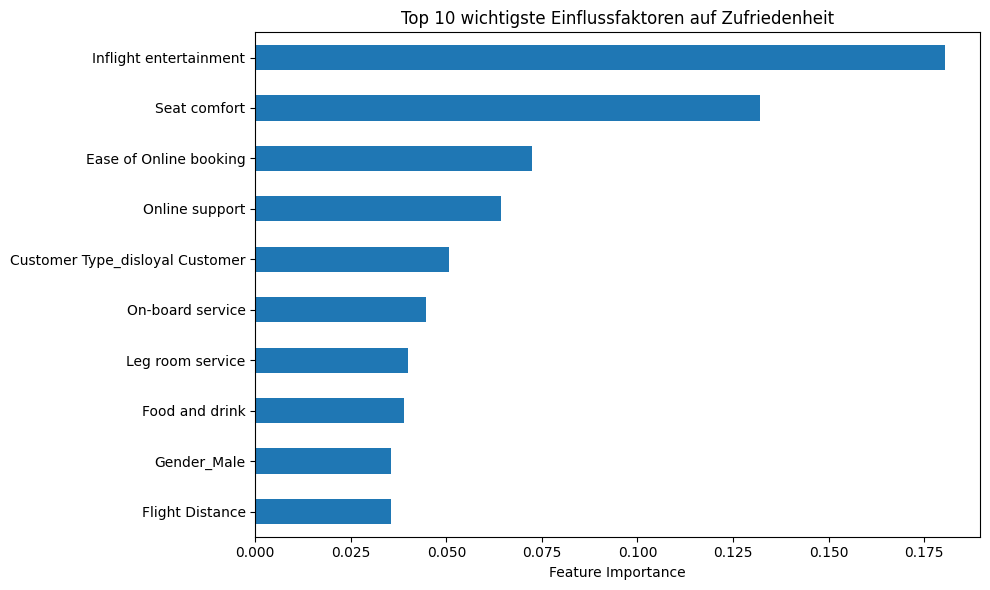

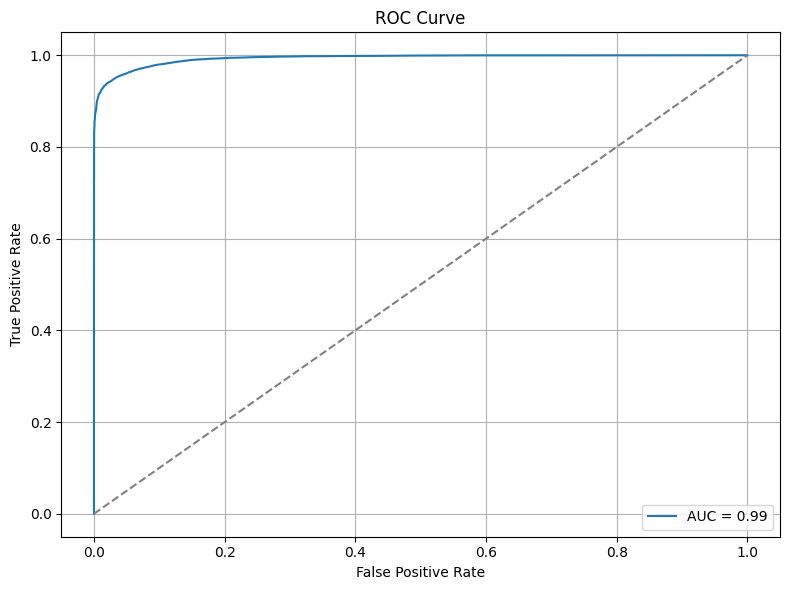

Frühwarnsystem: Kunden mit hoher Unzufriedenheitswahrscheinlichkeit (> 80%):
        Age  Flight Distance  Seat comfort  Departure/Arrival time convenient  \
103044   59             1470             4                                  4   
65543    55             3657             0                                  5   
65083    41             1796             0                                  4   
8092     58             2496             5                                  5   
105253   54             3260             5                                  5   

        Food and drink  Gate location  Inflight wifi service  \
103044               4              4                      5   
65543                0              2                      4   
65083                0              1                      2   
8092                 5              5                      4   
105253               5              5                      2   

        Inflight entertainment  Online support  Eas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# 1. CSV laden
df = pd.read_csv("data/Invistico_Airline.csv")  # Pfad ggf. anpassen

# 2. Zielspalte bereinigen und in numerisch umwandeln
df["satisfaction"] = df["satisfaction"].astype(str).str.strip().str.lower()
df = df[df["satisfaction"].isin(["satisfied", "dissatisfied"])]
df["satisfaction"] = df["satisfaction"].map({"satisfied": 1, "dissatisfied": 0})

# 3. One-Hot-Encoding für kategoriale Spalten
categorical_cols = ["Gender", "Customer Type", "Type of Travel", "Class"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 4. Feature-Ziel-Definition & Split
X = df.drop("satisfaction", axis=1)
y = df["satisfaction"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Modelltraining
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 6. Feature Importance Plot
importances = model.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feat_imp.head(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 10 wichtigste Einflussfaktoren auf Zufriedenheit")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()

# 7. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Frühwarnsystem: Kunden mit hoher Unzufriedenheitswahrscheinlichkeit
risk_threshold = 0.8
risk_customers = X_test.copy()
risk_customers["predicted_prob"] = y_proba
risk_customers["actual"] = y_test
risk_customers = risk_customers[risk_customers["predicted_prob"] > risk_threshold]

print("Frühwarnsystem: Kunden mit hoher Unzufriedenheitswahrscheinlichkeit (> 80%):")
print(risk_customers.head())